# Support Vector Machines
SVMs are used for classification and seperation from other classes. 
Example:-
- Linear SVM Classification
- Soft Margin Classification
- Non-linear SVM Classification
And much more

In [1]:
# We will use Iris dataset for calssification

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # Petal length, Petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

In [4]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [5]:
iris.target.ndim

1

In [6]:
y.mean()

0.3333333333333333

In [7]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [8]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [9]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Non-Linear SVM Classification

- Non-linear SVM classifiers are efficient and work well in many cases.
- One approach to handle non-linear features is to add more features, such as polynomial features.

## Example showing need of polynomial features for non-linear seperable datasets

Text(0.5, 1.0, "This is a non-linear seperable dataset i.e. it can't be seperated using linear classification algorithms")

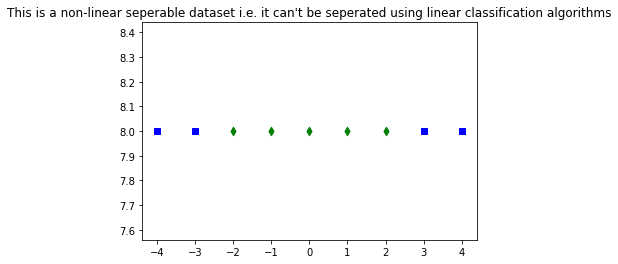

In [10]:
# Example for solving non-linear seperable datasets
import matplotlib.pyplot as plt
plot_x_green = [-2, -1, 0, 1, 2]
plot_y_green = [8, 8, 8, 8, 8]
plot_x_blue = [-4, -3, 3, 4]
plot_y_blue = [8, 8, 8, 8]

plt.scatter(plot_x_green, plot_y_green, color='green', marker="d")
plt.scatter(plot_x_blue, plot_y_blue, c="b", marker="s" )
plt.title("This is a non-linear seperable dataset i.e. it can't be seperated using linear classification algorithms")


In [11]:
[6]*6

[6, 6, 6, 6, 6, 6]

Text(0.5, 1.0, 'This dataset is linearly seperable now.')

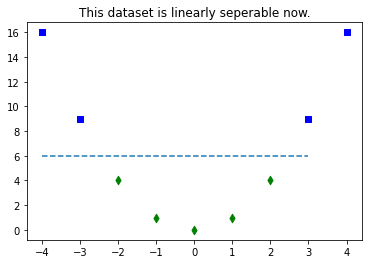

In [12]:
# but if we add polynomial feature
def addFeature(x, y):
    for i in range(len(y)):
        y[i] = x[i]**2

    return y

plot_y_green = addFeature(plot_x_green, plot_y_green)
plot_y_blue = addFeature(plot_x_blue, plot_y_blue)


plt.scatter(plot_x_green, plot_y_green, color='green', marker="d")
plt.scatter(plot_x_blue, plot_y_blue, c="b", marker="s" )
plt.plot(range(-4, 4), [6]*8, linestyle="dashed")
plt.title("This dataset is linearly seperable now.")



## Implementing using scikit learn

In [13]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


X, y = make_moons(n_samples=100, noise=0.5)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge')),

])

polynomial_svm_clf.fit(X, y)

c:\Users\amitk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scalar', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [14]:
print(X, y)

[[-1.26879020e+00  8.99800276e-01]
 [ 3.50917336e-01 -1.18212217e+00]
 [ 2.14509122e-01  6.32230557e-01]
 [ 8.13211961e-02  9.25351519e-01]
 [-4.87774640e-01  1.43308805e+00]
 [ 5.56169925e-01  2.98171099e-01]
 [ 4.14445897e-03  1.03465204e-01]
 [ 1.00653149e+00 -1.10717087e+00]
 [ 3.36103213e-01 -3.73706341e-01]
 [ 2.26275261e-02  1.07609459e+00]
 [ 3.74722457e-01 -1.55133165e-01]
 [ 4.73812408e-01  5.10100431e-02]
 [ 3.56564652e-01  1.02137145e+00]
 [ 1.02042784e+00  3.99904009e-01]
 [-8.42058433e-01  4.70140193e-01]
 [ 1.43457709e+00  1.51834624e+00]
 [-1.68506446e-01 -4.33470638e-01]
 [ 2.40169948e-01 -5.70539429e-01]
 [-6.08639633e-02  1.10573038e+00]
 [-3.58321296e-01  4.38629334e-01]
 [ 1.43013660e+00  4.54012371e-01]
 [-6.74410168e-01 -7.29870166e-02]
 [ 7.56321537e-01  1.60876566e+00]
 [-3.95060993e-01 -2.23574164e-01]
 [ 1.29767040e+00 -2.44310379e-01]
 [ 9.85898980e-01 -5.35201332e-01]
 [ 1.58766360e-01  7.21932130e-02]
 [ 1.48088676e-01 -5.97803465e-01]
 [-3.00125433e-01  6

# Polynomial Kernel
 - It is a technique to tackle the problem of low degree polynomial and high degree polynomials
 - As for low degree polynomial this method cannot deal with complex datasets and with high polynomial degree it creates huge number of features,making the model too slow.

In [15]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

# Similarity feaures
- Another technique to tackle nonlinear problems is to add features computed using similarity function, which measures how much each instance resembles a particukar landmark.
### Some similarity functions
 - Gaussian RBF (Gaussian Radial Basis Function). [ phi(x, l) = exp(-gamma * || x - l ||^2) ]

<code>Note: Though the similarity function method is good, but it is computationally expensive.</code>


## Gaussian RBF kernel


In [16]:
rbf_kernel_cvm_clf = Pipeline([
    ("scalar", StandardScaler()),
    ("svm_clf", SVC(kernel='rbf', gamma=5,C=0.001))
])
rbf_kernel_cvm_clf.fit(X,y)

Pipeline(steps=[('scalar', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

# SVM Regression 
- The SVM algorithm not only do classification but also capable of regression tasks and not only linear but also non-linear regression.
- The trick to use the SVM regression is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM regression tries to fit as many instances as possible on the street while limiting margin violations.
- The width of the street is controlled by a hyperparameter, epsilon (called <i>tol</i>).
- Scikit-learn's library LinearSVR is used to perform linear SVM Regression.

In [17]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y);

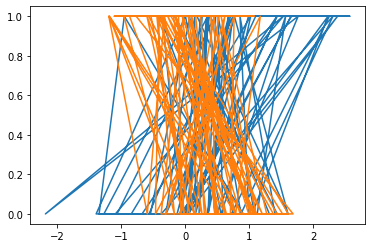

In [23]:
plt.plot(X, y)

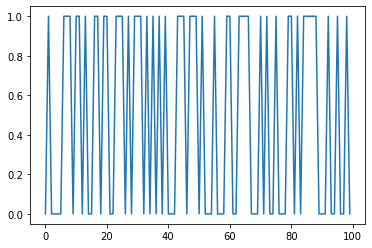

In [25]:
plt.plot(y)